In [64]:
# import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

In [72]:
# problem 1
# data preprocessing/cleaning
census = pd.read_csv('adult.data')
print(len(census))
census = census.replace(' ?', np.nan)
# find out which rows have missing values: none of them have missing values
# print(census[census.isnull().values.any(axis = 1)])
print(census.isnull().sum())
census = census.dropna()
# make dummy variables to run DT classifier
census_dummy = pd.get_dummies(census)
last_index = len(census_dummy.columns)
X = census_dummy[census_dummy.columns[1:(last_index-2)]]
y = census_dummy[census_dummy.columns[last_index - 1]]
# 80 - 20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

32560
39                   0
 State-gov        1836
 77516               0
 Bachelors           0
 13                  0
 Never-married       0
 Adm-clerical     1843
 Not-in-family       0
 White               0
 Male                0
 2174                0
 0                   0
 40                  0
 United-States     583
 <=50K               0
dtype: int64


Accuracy: 0.8168407094314603
ROC: 0.7531069873096745


/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


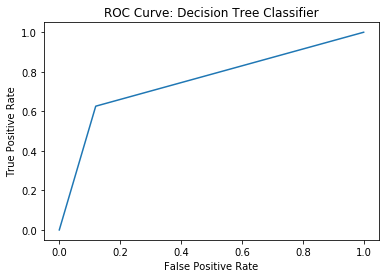

In [66]:
# Decision Tree
clf = DecisionTreeClassifier(criterion = 'entropy')
census_tree = clf.fit(x_train, y_train)
y_predict = census_tree.predict(x_test)
y_prob_predict = census_tree.predict_proba(x_train)
# accuracy: 81.7%
print('Accuracy:', accuracy_score(y_test, y_predict))
# roc curve: 75.3%
print('ROC:', roc_auc_score(y_test, y_predict))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(last_index - 2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict)
    roc_auc[i] = auc(fpr[i], tpr[i])
# decision tree ROC curve
fig0 = plt.figure()
plt.plot(fpr[1], tpr[1])
plt.title('ROC Curve: Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig0.show()
plt.savefig('tree_roc.png')

/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7870048068954086
ROC 0.6116832290480495


/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


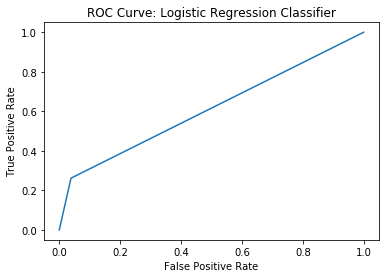

In [69]:
# Logistic Regression
logit = LogisticRegression()
census_logit_model = logit.fit(x_train, y_train)
logit_predict = census_logit_model.predict(x_test)
logit_prob_predict = census_logit_model.predict_proba(x_test)
# accuracy: 78.7%
print('Accuracy:', accuracy_score(y_test, logit_predict))
# ROC: 61.2%
print('ROC', roc_auc_score(y_test, logit_predict))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(last_index - 2):
    fpr[i], tpr[i], _ = roc_curve(y_test, logit_predict)
    roc_auc[i] = auc(fpr[i], tpr[i])
# decision tree ROC curve
fig1 = plt.figure()
plt.plot(fpr[1], tpr[1])
plt.title('ROC Curve: Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig1.show()
plt.savefig('logit_roc.png')

/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/skatta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Accuracy: 0.8238024200232057
ROC: 0.7040687402415975


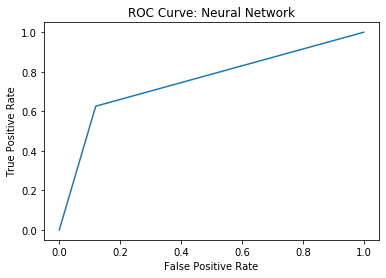

In [70]:
# Neural Network
# went with defaults
n_net = MLPClassifier()
census_net = n_net.fit(x_train, y_train)
net_pred = census_net.predict(x_test)
net_pred_prob = census_net.predict_proba(x_test)
# accuracy: 82.4%
print('Accuracy:', accuracy_score(y_test, net_pred))
# roc: 70.4%
print('ROC:', roc_auc_score(y_test, net_pred))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(last_index - 2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict)
    roc_auc[i] = auc(fpr[i], tpr[i])
# neural network ROC curve
fig2 = plt.figure()
plt.plot(fpr[1], tpr[1])
plt.title('ROC Curve: Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig2.show()
plt.savefig('n_net.png')